In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import itertools

In [2]:
mean_a = np.array([-1, -1])
cov_a = np.array([[2, 0.5], [0.5, 1]])

mean_b = np.array([1, -1])
cov_b = np.array([[1, -0.5], [-0.5, 2]])

mean_c = np.array([0, 1])
cov_c = np.array([[1, 0], [0, 2]])

sigma = np.array([0.5, 1, 2, 4, 8])

samples_1 = np.concatenate((np.random.multivariate_normal(mean_a, sigma[0] * cov_a, 100), \
    np.random.multivariate_normal(mean_b, sigma[0] * cov_b, 100), \
    np.random.multivariate_normal(mean_c, sigma[0] * cov_c, 100)), axis=0)
samples_2 = np.concatenate((np.random.multivariate_normal(mean_a, sigma[1] * cov_a, 100) , \
    np.random.multivariate_normal(mean_b, sigma[1] * cov_b, 100), \
    np.random.multivariate_normal(mean_c, sigma[1] * cov_c, 100)))
samples_3 = np.concatenate((np.random.multivariate_normal(mean_a, sigma[2] * cov_a, 100) , \
    np.random.multivariate_normal(mean_b, sigma[2] * cov_b, 100), \
    np.random.multivariate_normal(mean_c, sigma[2] * cov_c, 100)))
samples_4 = np.concatenate((np.random.multivariate_normal(mean_a, sigma[3] * cov_a, 100) , \
    np.random.multivariate_normal(mean_b, sigma[3] * cov_b, 100), \
    np.random.multivariate_normal(mean_c, sigma[3] * cov_c, 100)))
samples_5 = np.concatenate((np.random.multivariate_normal(mean_a, sigma[4] * cov_a, 100) , \
    np.random.multivariate_normal(mean_b, sigma[4] * cov_b, 100), \
    np.random.multivariate_normal(mean_c, sigma[4] * cov_c, 100)))


In [3]:
# implement K-means clustering on samples_1 to samples_5

# step 1: initialize the centroids
# step 2: assign each sample to the nearest centroid
# step 3: update the centroids
# step 4: repeat step 2 and 3 until convergence

#start
#step 1
def init_centroids(samples, k):
    centroids = np.zeros((k, samples.shape[1]))
    for i in range(k):
        centroids[i] = samples[np.random.randint(samples.shape[0])]
    return centroids

#step 2
def assign(samples, centroids):
    labels = np.zeros(samples.shape[0])
    for i in range(samples.shape[0]):
        labels[i] = np.argmin(np.linalg.norm(samples[i] - centroids, axis=1))
    return labels

#step 3
def update(samples, labels, k):
    centroids = np.zeros((k, samples.shape[1]))
    for i in range(k):
        centroids[i] = np.mean(samples[labels == i], axis=0)
    return centroids

#step 4
def kmeans(samples, k):
    centroids = init_centroids(samples, k)
    labels = assign(samples, centroids)
    while True:
        new_centroids = update(samples, labels, k)
        if np.array_equal(new_centroids, centroids):
            break
        centroids = new_centroids
        labels = assign(samples, centroids)
    return centroids, labels

#end

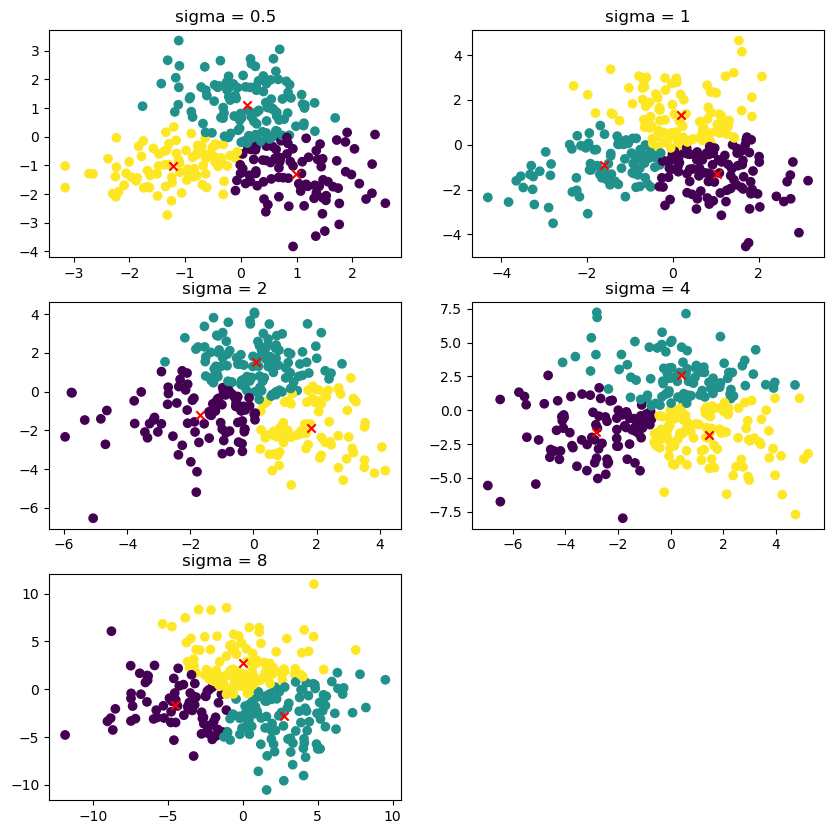

In [4]:
# k = 3
centroids_1, labels_1 = kmeans(samples_1, 3)
centroids_2, labels_2 = kmeans(samples_2, 3)
centroids_3, labels_3 = kmeans(samples_3, 3)
centroids_4, labels_4 = kmeans(samples_4, 3)
centroids_5, labels_5 = kmeans(samples_5, 3)

# plot the results
plt.figure(figsize=(10, 10))
plt.subplot(3, 2, 1)
plt.scatter(samples_1[:, 0], samples_1[:, 1], c=labels_1)
plt.scatter(centroids_1[:, 0], centroids_1[:, 1], marker='x', c='r')
plt.title('sigma = 0.5')
plt.subplot(3, 2, 2)
plt.scatter(samples_2[:, 0], samples_2[:, 1], c=labels_2)
plt.scatter(centroids_2[:, 0], centroids_2[:, 1], marker='x', c='r')
plt.title('sigma = 1')
plt.subplot(3, 2, 3)
plt.scatter(samples_3[:, 0], samples_3[:, 1], c=labels_3)
plt.scatter(centroids_3[:, 0], centroids_3[:, 1], marker='x', c='r')
plt.title('sigma = 2')
plt.subplot(3, 2, 4)
plt.scatter(samples_4[:, 0], samples_4[:, 1], c=labels_4)
plt.scatter(centroids_4[:, 0], centroids_4[:, 1], marker='x', c='r')
plt.title('sigma = 4')
plt.subplot(3, 2, 5)
plt.scatter(samples_5[:, 0], samples_5[:, 1], c=labels_5)
plt.scatter(centroids_5[:, 0], centroids_5[:, 1], marker='x', c='r')
plt.title('sigma = 8')
plt.show()

In [5]:
ture_labels = np.concatenate((2 * np.ones(100), np.ones(100), np.zeros(100),))
# ture labels is [0, 0, ..., 0, 1, 1, ..., 1, 2, 2, ..., 2]
# compute the accuracy of the clustering results
def accuracy(labels, true_labels):
    # try all possible permutations
    best_acc = 0
    for perm in itertools.permutations(np.unique(labels)):
        # create a vector with each perm value repeated 100 times
        perm_true_labels = np.repeat(perm, 100)
        acc = np.mean(labels == perm_true_labels)
        if acc > best_acc:
            best_acc = acc
    return best_acc, perm

print('sigma = 0.5, accuracy =', accuracy(labels_1, ture_labels))
print('sigma = 1, accuracy =', accuracy(labels_2, ture_labels))
print('sigma = 2, accuracy =', accuracy(labels_3, ture_labels))
print('sigma = 4, accuracy =', accuracy(labels_4, ture_labels))
print('sigma = 8, accuracy =', accuracy(labels_5, ture_labels))

sigma = 0.5, accuracy = (0.8, (2.0, 1.0, 0.0))
sigma = 1, accuracy = (0.7, (2.0, 1.0, 0.0))
sigma = 2, accuracy = (0.63, (2.0, 1.0, 0.0))
sigma = 4, accuracy = (0.53, (2.0, 1.0, 0.0))
sigma = 8, accuracy = (0.5033333333333333, (2.0, 1.0, 0.0))


In [6]:
# calculate the sum of squared distances between each sample and its centroid
def sum_squared_dist(samples, labels, centroids):
    dist = 0
    for i in range(samples.shape[0]):
        dist += np.linalg.norm(samples[i] - centroids[int(labels[i])]) ** 2
    return dist

print('sigma = 0.5, sum of squared distances =', sum_squared_dist(samples_1, labels_1, centroids_1))
print('sigma = 1, sum of squared distances =', sum_squared_dist(samples_2, labels_2, centroids_2))
print('sigma = 2, sum of squared distances =', sum_squared_dist(samples_3, labels_3, centroids_3))
print('sigma = 4, sum of squared distances =', sum_squared_dist(samples_4, labels_4, centroids_4))
print('sigma = 8, sum of squared distances =', sum_squared_dist(samples_5, labels_5, centroids_5))

sigma = 0.5, sum of squared distances = 314.8300072636186
sigma = 1, sum of squared distances = 513.5853385116259
sigma = 2, sum of squared distances = 867.8239341212743
sigma = 4, sum of squared distances = 1622.7582691080027
sigma = 8, sum of squared distances = 3187.8724340147082


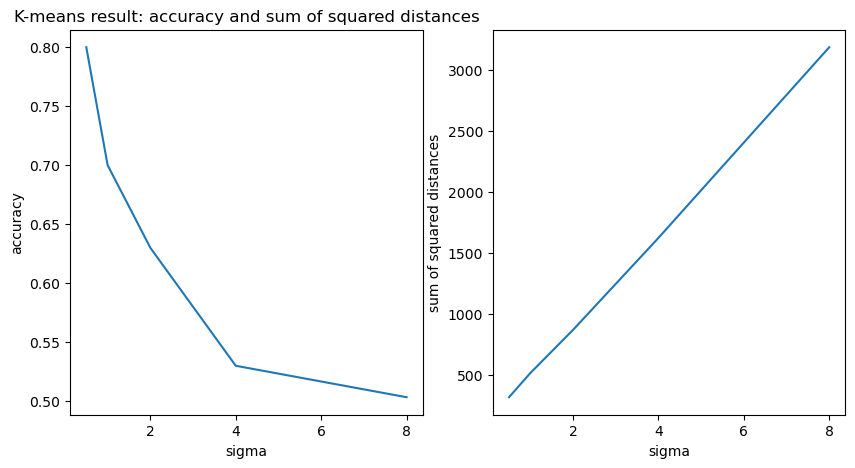

In [18]:
samples = [samples_1, samples_2, samples_3, samples_4, samples_5]
centroids_result = [centroids_1, centroids_2, centroids_3, centroids_4, centroids_5]
labels_result = [labels_1, labels_2, labels_3, labels_4, labels_5]

# plot the accuracy and sum of squared distances against sigma
acc = []
dist = []
for i in range(5):
    centroids, labels = centroids_result[i], labels_result[i]
    acc.append(accuracy(labels, ture_labels)[0])
    dist.append(sum_squared_dist(samples[i], labels, centroids))


plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(sigma, acc)
plt.title('K-means result: accuracy and sum of squared distances')
plt.xlabel('sigma')
plt.ylabel('accuracy')
plt.subplot(1, 2, 2)
plt.plot(sigma, dist)
plt.xlabel('sigma')
plt.ylabel('sum of squared distances')
plt.show()


In [8]:
# implement expectation maximizatio on samples_1 to samples_5

# step 1: initialize the parameters
# step 2: compute the responsibilities
# step 3: update the parameters
# step 4: repeat step 2 and 3 until convergence

#start
#step 1
def init_params(samples, k):
    params = {}
    params['pi'] = np.ones(k) / k
    params['mu'] = init_centroids(samples, k)
    # initialize the covariance matrices to be the random values on the diagonal and zeros elsewhere
    params['sigma'] = np.zeros((k, samples.shape[1], samples.shape[1]))
    for i in range(k):
        params['sigma'][i] = np.diag(np.random.rand(samples.shape[1]))
    return params

#step 2
def compute_responsibilities(samples, params):
    k = len(params['pi'])
    N = samples.shape[0]
    responsibilities = np.zeros((N, k))
    for i in range(k):
        responsibilities[:, i] = params['pi'][i] * stats.multivariate_normal.pdf(samples, params['mu'][i], params['sigma'][i], allow_singular=True)
    responsibilities = responsibilities / np.sum(responsibilities, axis=1, keepdims=True)
    return responsibilities

#step 3
def update_params(samples, responsibilities):
    k = responsibilities.shape[1]
    N = samples.shape[0]
    params = {}
    params['pi'] = np.sum(responsibilities, axis=0) / N
    params['mu'] = np.dot(responsibilities.T, samples) / np.sum(responsibilities, axis=0, keepdims=True).T
    params['sigma'] = np.zeros((k, samples.shape[1], samples.shape[1]))
    for i in range(k):
        diff = samples - params['mu'][i]
        params['sigma'][i] = np.dot(responsibilities[:, i] * diff.T, diff) / np.sum(responsibilities[:, i])
    return params

#step 4
def em(samples, k):
    params = init_params(samples, k)
    while True:
        responsibilities = compute_responsibilities(samples, params)
        new_params = update_params(samples, responsibilities)
        if np.allclose(params['pi'], new_params['pi']) and np.allclose(params['mu'], new_params['mu']) and np.allclose(params['sigma'], new_params['sigma']):
            break
        params = new_params
    return params, responsibilities

#end

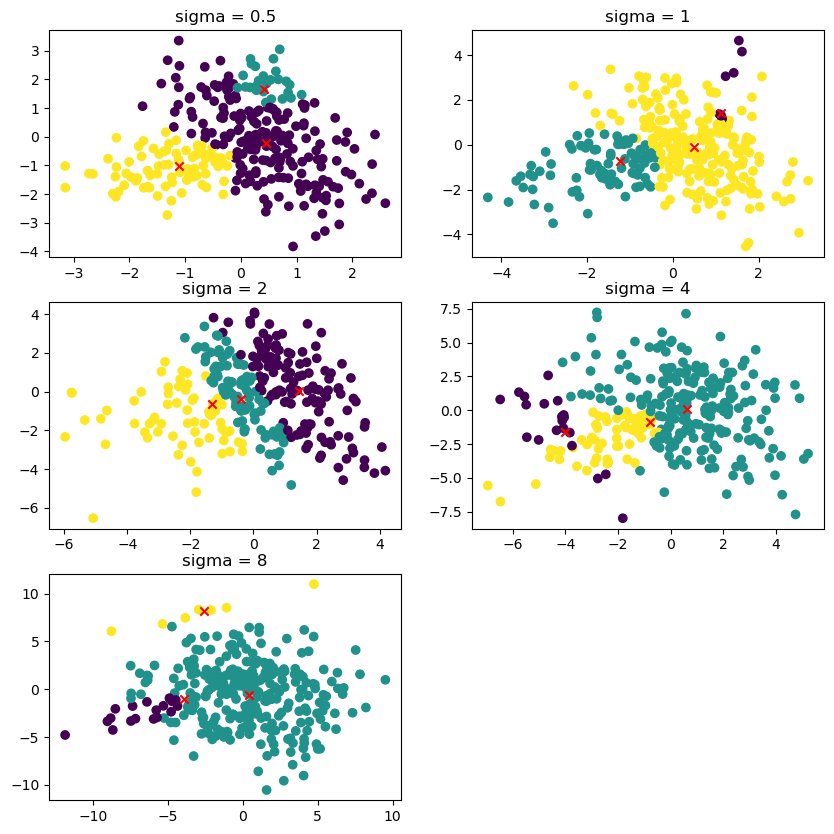

In [9]:
# k = 3
params_1, responsibilities_1 = em(samples_1, 3)
params_2, responsibilities_2 = em(samples_2, 3)
params_3, responsibilities_3 = em(samples_3, 3)
params_4, responsibilities_4 = em(samples_4, 3)
params_5, responsibilities_5 = em(samples_5, 3)

# plot the results
plt.figure(figsize=(10, 10))
plt.subplot(3, 2, 1)
plt.scatter(samples_1[:, 0], samples_1[:, 1], c=responsibilities_1.argmax(axis=1))
plt.scatter(params_1['mu'][:, 0], params_1['mu'][:, 1], marker='x', c='r')
plt.title('sigma = 0.5')
plt.subplot(3, 2, 2)
plt.scatter(samples_2[:, 0], samples_2[:, 1], c=responsibilities_2.argmax(axis=1))
plt.scatter(params_2['mu'][:, 0], params_2['mu'][:, 1], marker='x', c='r')
plt.title('sigma = 1')
plt.subplot(3, 2, 3)
plt.scatter(samples_3[:, 0], samples_3[:, 1], c=responsibilities_3.argmax(axis=1))
plt.scatter(params_3['mu'][:, 0], params_3['mu'][:, 1], marker='x', c='r')
plt.title('sigma = 2')
plt.subplot(3, 2, 4)
plt.scatter(samples_4[:, 0], samples_4[:, 1], c=responsibilities_4.argmax(axis=1))
plt.scatter(params_4['mu'][:, 0], params_4['mu'][:, 1], marker='x', c='r')
plt.title('sigma = 4')
plt.subplot(3, 2, 5)
plt.scatter(samples_5[:, 0], samples_5[:, 1], c=responsibilities_5.argmax(axis=1))
plt.scatter(params_5['mu'][:, 0], params_5['mu'][:, 1], marker='x', c='r')
plt.title('sigma = 8')
plt.show()

In [10]:
# compute the accuracy of the clustering results
print('sigma = 0.5, accuracy =', accuracy(responsibilities_1.argmax(axis=1), ture_labels))
print('sigma = 1, accuracy =', accuracy(responsibilities_2.argmax(axis=1), ture_labels))
print('sigma = 2, accuracy =', accuracy(responsibilities_3.argmax(axis=1), ture_labels))
print('sigma = 4, accuracy =', accuracy(responsibilities_4.argmax(axis=1), ture_labels))
print('sigma = 8, accuracy =', accuracy(responsibilities_5.argmax(axis=1), ture_labels))

sigma = 0.5, accuracy = (0.65, (2, 1, 0))
sigma = 1, accuracy = (0.5566666666666666, (2, 1, 0))
sigma = 2, accuracy = (0.5033333333333333, (2, 1, 0))
sigma = 4, accuracy = (0.43666666666666665, (2, 1, 0))
sigma = 8, accuracy = (0.4033333333333333, (2, 1, 0))


In [11]:
# compute the sum of squared distances of the clustering results
print('sigma = 0.5, sum of squared distances =', sum_squared_dist(samples_1, responsibilities_1.argmax(axis=1), params_1['mu']))
print('sigma = 1, sum of squared distances =', sum_squared_dist(samples_2, responsibilities_2.argmax(axis=1), params_2['mu']))
print('sigma = 2, sum of squared distances =', sum_squared_dist(samples_3, responsibilities_3.argmax(axis=1), params_3['mu']))
print('sigma = 4, sum of squared distances =', sum_squared_dist(samples_4, responsibilities_4.argmax(axis=1), params_4['mu']))
print('sigma = 8, sum of squared distances =', sum_squared_dist(samples_5, responsibilities_5.argmax(axis=1), params_5['mu']))

sigma = 0.5, sum of squared distances = 550.3211158695794
sigma = 1, sum of squared distances = 891.175363451606
sigma = 2, sum of squared distances = 1441.003434902132
sigma = 4, sum of squared distances = 2950.602263624881
sigma = 8, sum of squared distances = 6081.038615908798


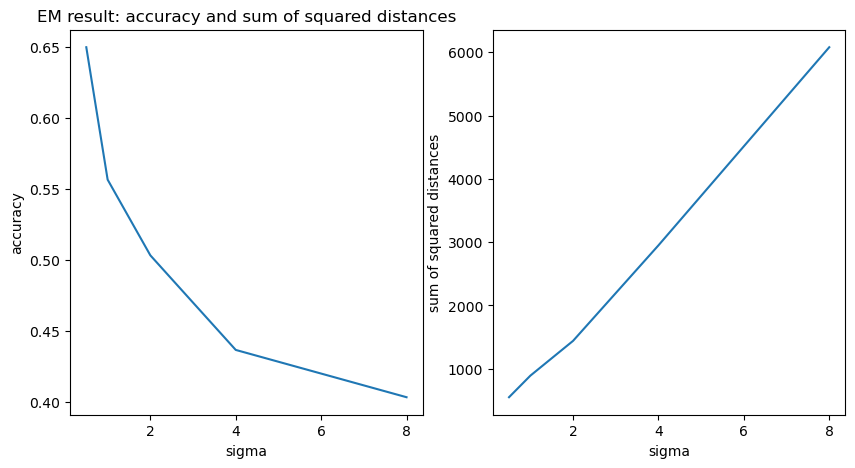

In [19]:
samples = [samples_1, samples_2, samples_3, samples_4, samples_5]
params_result = [params_1, params_2, params_3, params_4, params_5]
responsibilities_result = [responsibilities_1, responsibilities_2, responsibilities_3, responsibilities_4, responsibilities_5]

# plot the accuracy and sum of squared distances against sigma
acc = []
dist = []
for i in range(5):
    params = params_result[i]
    responsibilities = responsibilities_result[i]
    acc.append(accuracy(responsibilities.argmax(axis=1), ture_labels)[0])
    dist.append(sum_squared_dist(samples[i], responsibilities.argmax(axis=1), params['mu']))
acc = np.array(acc)
dist = np.array(dist)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('EM result: accuracy and sum of squared distances')
plt.plot(sigma, acc)
plt.xlabel('sigma')
plt.ylabel('accuracy')
plt.subplot(1, 2, 2)
plt.plot(sigma, dist)
plt.xlabel('sigma')
plt.ylabel('sum of squared distances')
plt.show()
